# Load Packages

In [444]:
import numpy as np
import pandas as pd

#시각화
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import koreanize_matplotlib #한글 깨짐 방지
import plotly.express as px

#날짜
from datetime import datetime

#확률분포
from scipy.stats import uniform, randint

#모델 저장
import pickle

from statsmodels.stats.outliers_influence import variance_inflation_factor #다중공선성 VIF

#Scikit learn
from sklearn import tree
from sklearn.model_selection import train_test_split #데이터 분할
from sklearn.tree import plot_tree #결정트리 시각화
import graphviz #결정트리 시각화
from sklearn.tree import export_graphviz #결정트리 시각화
from sklearn.metrics import accuracy_score #정확도 구하기
from sklearn.pipeline import Pipeline #파이프라인
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법
from sklearn.preprocessing import OneHotEncoder # 원핫인코딩(범주형변수 -> 수치형 변수)
from sklearn.linear_model import LogisticRegression # 로지스틱회귀
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트 회귀
from sklearn.ensemble import GradientBoostingClassifier # 그래디언트 부스트 분류
from sklearn.ensemble import GradientBoostingRegressor # 그래디언트 부스트 회귀
from sklearn.ensemble import AdaBoostClassifier #ada부스트 분류
from sklearn.tree import DecisionTreeClassifier #결정트리 분류
from sklearn.tree import DecisionTreeRegressor #결정트리 회귀
from sklearn.model_selection import GridSearchCV #그리드서치 하이퍼파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV #랜덤서치 하이퍼파라미터 튜닝
from sklearn.model_selection import cross_val_predict #Cross Validation predict
from sklearn.metrics import r2_score #결정계수
from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.metrics import r2_score #결정계수
from sklearn.metrics import mean_squared_error, root_mean_squared_error #MSE, RMSE
from sklearn.preprocessing import PolynomialFeatures #다항회귀
from sklearn.linear_model import Lasso #라쏘회귀
from sklearn.linear_model import Ridge #릿지회귀
from sklearn.linear_model import ElasticNet #엘라스틱넷 규제
from sklearn.preprocessing import StandardScaler #표준화
from sklearn.metrics import accuracy_score #정확도
from sklearn.metrics import f1_score #f1 score
from sklearn.metrics import roc_auc_score, roc_curve #ROC 곡선
from sklearn.metrics import confusion_matrix #오차행렬(실제, 예측 행렬)
from sklearn.inspection import permutation_importance #변수의 중요도

# 저번에 했던 것

In [445]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [446]:
train=train_data.copy()
test=test_data.copy() #원본 데이터 보호
# train.dropna(inplace=True)
# test.dropna(inplace=True)

In [447]:
train_data.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [448]:
train_data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8040,8040.000000,8040.000000,7240.000000,8040.000000,7238.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,7238,8040,8040
unique,335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990,7608,7817
mean,NaN,709.775995,11.500000,13.498564,58.271020,1.756756,1459.170896,4.522239,0.587072,0.152164,0.066493,NaN,NaN,NaN
std,NaN,657.320605,6.922617,12.270471,20.340492,1.045901,603.716284,13.393517,0.886186,1.127026,0.378182,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,485.000000,11.500000,15.600000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1080.500000,17.250000,23.300000,74.000000,2.400000,2000.000000,15.600000,0.960000,0.000000,0.000000,NaN,NaN,NaN


딱히 결측치 제외하고 다른 이상치는 없어 보인다.

## 결측치

저번에는 결측치를 제거하였지만 이번에는 제거하지 않고 최대한 보간을 진행하겠다

In [449]:
train.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [450]:
test.isna().sum()

Date                          0
Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
dtype: int64

온도, 풍속, 시즌이 문제다

### 1. Seasons

In [451]:
train['date'] = pd.to_datetime(train['Date'], format="%d/%m/%Y")
test['date'] = pd.to_datetime(test['Date'], format="%d/%m/%Y")
train['year'] = train['date'].dt.year # 연도
train['month'] = train['date'].dt.month # 월
train['weekday'] = train['date'].dt.day_name() # 요일
test['year'] = test['date'].dt.year # 연도
test['month'] = test['date'].dt.month # 월
test['weekday'] = test['date'].dt.day_name() # 요일
train.drop(["Date","date"], axis=1, inplace=True)
test.drop(["Date","date"], axis=1, inplace=True)

날짜 파생변수 생성

In [452]:
train[["month","Seasons"]].value_counts(sort=False)

month  Seasons
1      Winter     660
2      Winter     611
3      Spring     677
4      Spring     643
5      Spring     670
6      Summer     645
7      Summer     680
8      Summer     665
9      Autumn     650
10     Autumn     673
12     Winter     664
Name: count, dtype: int64

12~2 : Winter, 3~5 : Spring, 6~8 : Summer, 9~11 : Autumn

In [453]:
def fill_seasons(row):
    if pd.isna(row['Seasons']):
        if row['month'] in [12, 1, 2]:
            return 'Winter'
        elif row['month'] in [3, 4, 5]:
            return 'Spring'
        elif row['month'] in [6, 7, 8]:
            return 'Summer'
        elif row['month'] in [9, 10, 11]:
            return 'Autumn'
    else:
        return row['Seasons'] #결측치가 아니면 그대로 반환

train['Seasons'] = train.apply(fill_seasons, axis=1)

In [454]:
train[["month","Seasons"]].value_counts(sort=False)

month  Seasons
1      Winter     744
2      Winter     672
3      Spring     744
4      Spring     720
5      Spring     744
6      Summer     720
7      Summer     744
8      Summer     744
9      Autumn     720
10     Autumn     744
12     Winter     744
Name: count, dtype: int64

In [455]:
train.isna().sum()

Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
year                           0
month                          0
weekday                        0
dtype: int64

Seasons결측치를 다 제거하였다

In [456]:
test[["month","Seasons"]].value_counts(sort=False)

month  Seasons
11     Autumn     646
Name: count, dtype: int64

test데이터에는 전부 11월밖에 없다.

In [ ]:
def fill_autumn(data):
    if pd.isna(data["Seasons"]):
        return "Autumn"
    else:
        return data["Seasons"]
test["Seasons"]=test.apply(fill_autumn, axis=1)

In [458]:
test[["month","Seasons"]].value_counts(sort=False)

month  Seasons
11     Autumn     720
Name: count, dtype: int64

In [459]:
test.isna().sum()

Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                       0
Holiday                       0
Functioning Day               0
year                          0
month                         0
weekday                       0
dtype: int64

### 2. Temperature(째C), Wind speed (m/s)  

인코딩문제로 변수명이 이상하지만 그대로 진행하겠다

In [460]:
train[["Rented Bike Count",'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']].corr()


,Rented Bike Count,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.549391,-0.188578,0.115569,0.196718,0.398034,0.265525,-0.123920,-0.150621
Temperature(째C),0.549391,1.000000,0.166340,-0.056962,0.033322,0.917007,0.349506,0.049341,-0.243888
Humidity(%),-0.188578,0.166340,1.000000,-0.344381,-0.537763,0.535527,-0.465179,0.241985,0.080777
Wind speed (m/s),0.115569,-0.056962,-0.344381,1.000000,0.160908,-0.196218,0.330732,-0.032976,-0.000537
Visibility (10m),0.196718,0.033322,-0.537763,0.160908,1.000000,-0.174204,0.145593,-0.178202,-0.110523
Dew point temperature(째C),0.398034,0.917007,0.535527,-0.196218,-0.174204,1.000000,0.093286,0.125273,-0.179787
Solar Radiation (MJ/m2),0.265525,0.349506,-0.465179,0.330732,0.145593,0.093286,1.000000,-0.077066,-0.078547
Rainfall(mm),-0.123920,0.049341,0.241985,-0.032976,-0.178202,0.125273,-0.077066,1.000000,-0.007033
Snowfall (cm),-0.150621,-0.243888,0.080777,-0.000537,-0.110523,-0.179787,-0.078547,-0.007033,1.000000


Wind speed (m/s)는 Rented Bike Count와 상관관계가 낮으므로 제거할것이지만, <br>
Temperature(째C)는 상관관계가 높으므로 보간을 진행할 것이다

In [461]:
train.dropna(subset=["Wind speed (m/s)"], inplace=True)

In [462]:
train.isna().sum()

Rented Bike Count              0
Hour                           0
Temperature(째C)              720
Humidity(%)                    0
Wind speed (m/s)               0
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
year                           0
month                          0
weekday                        0
dtype: int64

In [463]:
test.dropna(subset=["Wind speed (m/s)"], inplace=True)

In [464]:
test.isna().sum()

Hour                          0
Temperature(째C)              71
Humidity(%)                   0
Wind speed (m/s)              0
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                       0
Holiday                       0
Functioning Day               0
year                          0
month                         0
weekday                       0
dtype: int64

온도는 어떻게 하지? 외부 데이터를 가져오기엔 문제가 있다
- 어느 지역인지 모르는데 어떻함
- 따라서 회귀분석을 통해 온도 데이터를 보간하자

`주의해야할 점`
- 우리가 원하는 것은 Rented Bike Count값이지 Temperature(째C)값이 아니다.
- 따라서 Temperature(째C)값을 회귀분석을 통해 보간을 하는 과정에서 오류가 생기면
- 나비효과에 의해 최종 결과에서 오류가 가중될 수 있다.
- 따라서 저번주 분석에서는 모든 결측치를 다 제거하였지만
- 이번에는 보간을 하는 방법을 사용할 것이다.

In [465]:
train[["Rented Bike Count",'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']].corr()


,Rented Bike Count,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.551779,-0.191887,0.115569,0.204563,0.398079,0.268195,-0.127147,-0.149691
Temperature(째C),0.551779,1.000000,0.160655,-0.056962,0.037172,0.915726,0.351053,0.048824,-0.242123
Humidity(%),-0.191887,0.160655,1.000000,-0.344381,-0.540364,0.533595,-0.472403,0.246236,0.077912
Wind speed (m/s),0.115569,-0.056962,-0.344381,1.000000,0.160908,-0.196218,0.330732,-0.032976,-0.000537
Visibility (10m),0.204563,0.037172,-0.540364,0.160908,1.000000,-0.172236,0.153354,-0.182604,-0.106362
Dew point temperature(째C),0.398079,0.915726,0.533595,-0.196218,-0.172236,1.000000,0.088933,0.127256,-0.180562
Solar Radiation (MJ/m2),0.268195,0.351053,-0.472403,0.330732,0.153354,0.088933,1.000000,-0.079472,-0.079209
Rainfall(mm),-0.127147,0.048824,0.246236,-0.032976,-0.182604,0.127256,-0.079472,1.000000,-0.005893
Snowfall (cm),-0.149691,-0.242123,0.077912,-0.000537,-0.106362,-0.180562,-0.079209,-0.005893,1.000000


온도는 습도, 이슬점, 자외선지수, 적설량이랑 상관관계가 크다.
- 하지만 종속관계는 명확하지 않다. (다만 대여량 변수는 종속관계가 명확하기에 사용하지 않는다).

<br>`month변수 대신 Seasons변수를 사용할 것이다.`
- 왜냐하면 test데이터에는 month가 11월인 경우밖에 없기 때문이다.

In [466]:
temp_var=["Humidity(%)","Dew point temperature(째C)","Solar Radiation (MJ/m2)","Snowfall (cm)"]

In [467]:
train[["month","year"]].value_counts(sort=False)

month  year
1      2018    661
2      2018    594
3      2018    669
4      2018    659
5      2018    675
6      2018    654
7      2018    670
8      2018    675
9      2018    658
10     2018    649
12     2017    674
Name: count, dtype: int64

In [468]:
test[["month","year"]].value_counts(sort=False)

month  year
11     2018    646
Name: count, dtype: int64

또한 본 데이터는 1년동안의 데이터이므로 year변수도 사용하지 않을 것이다

릿지, 라쏘의 균형을 맞춰주는 엘라스틱넷을 사용할것이다.

결측치가 있는 데이터와 없는 데이터로 분리

In [469]:
temp_train=train.copy()
temp_test=test.copy()

In [470]:
temp_train=temp_train[["Temperature(째C)"]+temp_var+["Seasons"]]
temp_test=temp_test[["Temperature(째C)"]+temp_var+["Seasons"]]

명목형 변수 레퍼런스코딩

In [471]:
temp_season=pd.get_dummies(temp_train["Seasons"], drop_first=True)
temp_train=pd.concat([temp_train.drop("Seasons", axis=1),temp_season], axis=1)

In [472]:
temp_train

,Temperature(째C),Humidity(%),Dew point temperature(째C),Solar Radiation (MJ/m2),Snowfall (cm),Spring,Summer,Winter
0,-5.2,37,-17.6,0.00,0.0,False,False,True
1,-5.5,38,-17.6,0.00,0.0,False,False,True
2,-6.0,39,-17.7,0.00,0.0,False,False,True
3,-6.2,40,-17.6,0.00,0.0,False,False,True
5,-6.4,37,-18.7,0.00,0.0,False,False,True
...,...,...,...,...,...,...,...,...
8033,11.3,41,-1.4,0.51,0.0,False,False,False
8036,7.6,59,0.0,0.00,0.0,False,False,False
8037,7.6,59,0.0,0.00,0.0,False,False,False
8038,6.8,58,-0.9,0.00,0.0,False,False,False


In [473]:
temp_test.Seasons.unique()

array(['Autumn'], dtype=object)

test데이터는 전부 Autumn이다

In [474]:
temp_test[["Spring","Summer","Winter"]]=False

In [475]:
temp_test.drop("Seasons", axis=1, inplace=True)
temp_test

,Temperature(째C),Humidity(%),Dew point temperature(째C),Solar Radiation (MJ/m2),Snowfall (cm),Spring,Summer,Winter
0,5.7,62,-1.0,0.0,0.0,False,False,False
1,5.1,65,-0.9,0.0,0.0,False,False,False
3,4.2,65,-1.8,0.0,0.0,False,False,False
4,3.6,70,-1.3,0.0,0.0,False,False,False
5,3.3,72,-1.2,0.0,0.0,False,False,False
...,...,...,...,...,...,...,...,...
715,4.2,34,-10.3,0.0,0.0,False,False,False
716,3.4,37,-9.9,0.0,0.0,False,False,False
717,2.6,39,-9.9,0.0,0.0,False,False,False
718,2.1,41,-9.8,0.0,0.0,False,False,False


결측치가 없는 데이터로 학습을 한 후, 결측치를 예측할 것이다.

In [476]:
train_none_na=temp_train.dropna()
test_none_na=temp_test.dropna()

train_na=temp_train[temp_train["Temperature(째C)"].isna()]
test_na=temp_test[temp_test["Temperature(째C)"].isna()]

In [477]:
train_na.isna().sum()

Temperature(째C)              720
Humidity(%)                    0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Snowfall (cm)                  0
Spring                         0
Summer                         0
Winter                         0
dtype: int64

In [478]:
temp_data=pd.concat([train_none_na,test_none_na], axis=0)

데이터를 합춰서 하나의 예측학습용 데이터를 만들자

In [479]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7093 entries, 0 to 719
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature(째C)            7093 non-null   float64
 1   Humidity(%)                7093 non-null   int64  
 2   Dew point temperature(째C)  7093 non-null   float64
 3   Solar Radiation (MJ/m2)    7093 non-null   float64
 4   Snowfall (cm)              7093 non-null   float64
 5   Spring                     7093 non-null   bool   
 6   Summer                     7093 non-null   bool   
 7   Winter                     7093 non-null   bool   
dtypes: bool(3), float64(4), int64(1)
memory usage: 353.3 KB


In [480]:
temp_data.isna().sum()

Temperature(째C)              0
Humidity(%)                  0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Snowfall (cm)                0
Spring                       0
Summer                       0
Winter                       0
dtype: int64

In [481]:
scaler=StandardScaler()
temp_data[temp_var] = scaler.fit_transform(temp_data[temp_var]) #수치형변수이므로 표준화 작업 진행

In [482]:
temp_data.describe(include='all')

,Temperature(째C),Humidity(%),Dew point temperature(째C),Solar Radiation (MJ/m2),Snowfall (cm),Spring,Summer,Winter
count,7093.000000,7.093000e+03,7.093000e+03,7.093000e+03,7.093000e+03,7093,7093,7093
unique,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,5283,5264,5374
mean,13.082927,8.014016e-17,-6.411213e-17,-2.404205e-17,6.411213e-17,NaN,NaN,NaN
std,11.931673,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,NaN,NaN,NaN
min,-17.800000,-2.853386e+00,-2.672781e+00,-6.614117e-01,-1.730874e-01,NaN,NaN,NaN
25%,3.700000,-7.436525e-01,-6.699600e-01,-6.614117e-01,-1.730874e-01,NaN,NaN,NaN
50%,14.100000,-5.676240e-02,8.205703e-02,-6.500306e-01,-1.730874e-01,NaN,NaN,NaN
75%,22.600000,7.773184e-01,8.264004e-01,4.311716e-01,-1.730874e-01,NaN,NaN,NaN


표준화가 잘 되었다

In [483]:
X_train, X_test, Y_train, Y_test = train_test_split(temp_data.drop("Temperature(째C)", axis=1), temp_data["Temperature(째C)"], test_size=0.2, random_state=1234)

In [484]:
temp_model=ElasticNet(fit_intercept=True) #종속변수가 정규화 되지 않았으므로 상수항 포함

In [485]:
hyperparam = {'alpha' : np.arange(0.1, 2.1, 0.1),
              "l1_ratio" : np.arange(0, 1.1, 0.1) #0이면 ridge, 1이면 lasso와 같음
}

In [486]:
grid_elstic = GridSearchCV(temp_model, param_grid=hyperparam, cv=5, scoring="r2", n_jobs=-1, verbose=1)
grid_elstic.fit(X_train, Y_train)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2', verbose=1)

In [487]:
#회귀모델 평가함수
def eval_regression(model):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    #MAPE를 구하는데 inf값이 나와 오류가 발생
    train_finite_values = np.abs((Y_train - Y_train_pred) / Y_train)
    train_finite_values = train_finite_values[np.isfinite(train_finite_values)]
    train_MAPE=train_finite_values.mean()*100
    
    test_finite_values = np.abs((Y_test - Y_test_pred) / Y_test)
    test_finite_values = test_finite_values[np.isfinite(test_finite_values)]
    test_MAPE=test_finite_values.mean()*100
    
    print('학습 능력')
    print('학습 결정계수 : ', r2_score(Y_train, Y_train_pred))
    print('학습 RMSE : ', root_mean_squared_error(Y_train, Y_train_pred))
    print('학습 MAPE : ', train_MAPE,'%')
    print("\n")
    print('일반화 능력')
    print('검정 결정계수 : ', r2_score(Y_test, Y_test_pred))
    print('검정 RMSE : ', root_mean_squared_error(Y_test, Y_test_pred))
    print('검정 MAPE : ', test_MAPE,'%')

In [488]:
best_temp_model=grid_elstic.best_estimator_

In [489]:
eval_regression(best_temp_model)

학습 능력
학습 결정계수 :  0.9873530125952973
학습 RMSE :  1.3355043932744857
학습 MAPE :  21.060481547408532 %


일반화 능력
검정 결정계수 :  0.987128238231852
검정 RMSE :  1.375446361886437
검정 MAPE :  17.76904436716622 %


모델 점수가 좋게 나왔다 (과적합일 가능성이 높지만 지금은 넘어가자)

결측치 예측하기

예측 데이터도 표준화 작업을 꼭 빼먹지 말고 진행하자

In [490]:
train_na[temp_var] = scaler.transform(train_na[temp_var])
test_na[temp_var] = scaler.transform(test_na[temp_var]) 

C:\Users\swoo6\AppData\Local\Temp\ipykernel_24312\58309180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_na[temp_var] = scaler.transform(train_na[temp_var])
C:\Users\swoo6\AppData\Local\Temp\ipykernel_24312\58309180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_na[temp_var] = scaler.transform(test_na[temp_var])


In [491]:
train_na.describe(include='all')

,Temperature(째C),Humidity(%),Dew point temperature(째C),Solar Radiation (MJ/m2),Snowfall (cm),Spring,Summer,Winter
count,0.0,720.000000,720.000000,720.000000,720.000000,720,720,720
unique,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,527,550,510
mean,NaN,0.066169,-0.042927,-0.075824,-0.023272,NaN,NaN,NaN
std,NaN,1.026319,1.050118,0.942548,0.892409,NaN,NaN,NaN
min,NaN,-2.853386,-2.488613,-0.661412,-0.173087,NaN,NaN,NaN
25%,NaN,-0.743653,-0.792738,-0.661412,-0.173087,NaN,NaN,NaN
50%,NaN,-0.007699,0.043689,-0.650031,-0.173087,NaN,NaN,NaN
75%,NaN,0.924509,0.851340,0.212086,-0.173087,NaN,NaN,NaN


In [492]:
train_na["Temperature(째C)"]=best_temp_model.predict(train_na.drop("Temperature(째C)", axis=1))
test_na["Temperature(째C)"]=best_temp_model.predict(test_na.drop("Temperature(째C)", axis=1))

C:\Users\swoo6\AppData\Local\Temp\ipykernel_24312\956860280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_na["Temperature(째C)"]=best_temp_model.predict(train_na.drop("Temperature(째C)", axis=1))
C:\Users\swoo6\AppData\Local\Temp\ipykernel_24312\956860280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_na["Temperature(째C)"]=best_temp_model.predict(test_na.drop("Temperature(째C)", axis=1))


In [493]:
train_na["Temperature(째C)"].describe()

count    720.000000
mean      12.137341
std       12.103669
min      -14.197849
25%        1.807748
50%       13.645422
75%       22.291510
max       36.147027
Name: Temperature(째C), dtype: float64

In [494]:
test_na["Temperature(째C)"].describe()

count    71.000000
mean      8.726032
std       4.583004
min       0.040519
25%       5.635141
50%       7.704561
75%      11.907228
max      17.686585
Name: Temperature(째C), dtype: float64

`온도 예측은 완료되었다`
- 이제 이 데이터를 원래 train, test데이터의 결측치에 넣자

In [495]:
train.loc[train['Temperature(째C)'].isna(), 'Temperature(째C)']=train_na['Temperature(째C)']
test.loc[test['Temperature(째C)'].isna(), 'Temperature(째C)']=test_na['Temperature(째C)']

In [496]:
train.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
year                         0
month                        0
weekday                      0
dtype: int64

In [497]:
train.describe()

,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month
count,7238.000000,7238.000000,7238.000000,7238.000000,7238.000000,7238.000000,7238.000000,7238.000000,7238.000000,7238.000000,7238.00000,7238.000000
mean,712.382150,11.535645,13.416370,58.383117,1.756756,1456.556645,4.610445,0.590939,0.151561,0.065460,2017.90688,6.131666
std,659.621348,6.908373,12.251422,20.401851,1.045901,606.374413,13.373994,0.889776,1.093702,0.374289,0.29062,3.307624
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.00000,1.000000
25%,190.000000,6.000000,3.300000,43.000000,1.000000,972.000000,-4.500000,0.000000,0.000000,0.000000,2018.00000,3.000000
50%,486.000000,12.000000,15.500000,57.000000,1.600000,1741.000000,6.500000,0.020000,0.000000,0.000000,2018.00000,6.000000
75%,1087.000000,18.000000,23.200000,74.000000,2.400000,2000.000000,15.600000,0.970000,0.000000,0.000000,2018.00000,9.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000,2018.00000,12.000000


In [498]:
test.isna().sum()

Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
year                         0
month                        0
weekday                      0
dtype: int64

In [499]:
test.describe()

,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.0,646.0
mean,11.431889,7.814161,57.222910,1.396285,1194.828173,-1.078483,0.375789,0.116563,0.143034,2018.0,11.0
std,6.963081,4.567107,20.652905,0.853039,602.692818,6.786993,0.612311,1.200176,0.739729,0.0,0.0
min,0.000000,-3.000000,13.000000,0.000000,33.000000,-19.000000,0.000000,0.000000,0.000000,2018.0,11.0
25%,5.000000,4.400000,40.250000,0.800000,643.500000,-5.575000,0.000000,0.000000,0.000000,2018.0,11.0
50%,11.000000,7.561365,57.000000,1.200000,1219.000000,0.150000,0.000000,0.000000,0.000000,2018.0,11.0
75%,17.000000,11.100000,75.000000,1.900000,1795.000000,3.600000,0.547500,0.000000,0.000000,2018.0,11.0
max,23.000000,19.300000,97.000000,5.300000,2000.000000,13.400000,2.220000,18.000000,8.800000,2018.0,11.0


모든 결측치를 다 보간하는데 성공하였다.
- 이상치가 생성되지 않았다

## 모델 적용하기 위한 데이터 전처리

In [500]:
#연속형변수
cont_var=['Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
#명목형변수
cat_var=['Functioning Day', 'Holiday', 'Hour', 'month', 'weekday', 'year', 'Seasons']

In [501]:
train[cat_var]=train[cat_var].astype("category")
test[cat_var]=test[cat_var].astype("category")

명목형 변수 속성 변환 (데이터 분석 가능한 형식으로)

In [502]:
train_cat=pd.get_dummies(train[cat_var], drop_first=True)
test_cat=pd.get_dummies(test[cat_var], drop_first=True)

명목형변수 레퍼런스코딩

In [503]:
scaler=StandardScaler()
train[cont_var] = scaler.fit_transform(train[cont_var])
test[cont_var] = scaler.transform(test[cont_var])

수치형변수 표준화

In [504]:
train=pd.concat([train['Rented Bike Count'],train[cont_var],train_cat], axis=1)
test=pd.concat([test[cont_var],test_cat], axis=1)

데이터 합치기

In [505]:
train.drop(columns=train.filter(like="month").columns, inplace=True)
test.drop(columns=test.filter(like="month").columns, inplace=True)

month변수를 제거해야지 회귀모델이 잘 설명되었으므로 지금도 이렇게 반복한다

In [506]:
X=train.drop("Rented Bike Count", axis=1)
Y=train["Rented Bike Count"].copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234) 

학습, 검정 데이터 분할

# 저번에 했던 것의 문제점

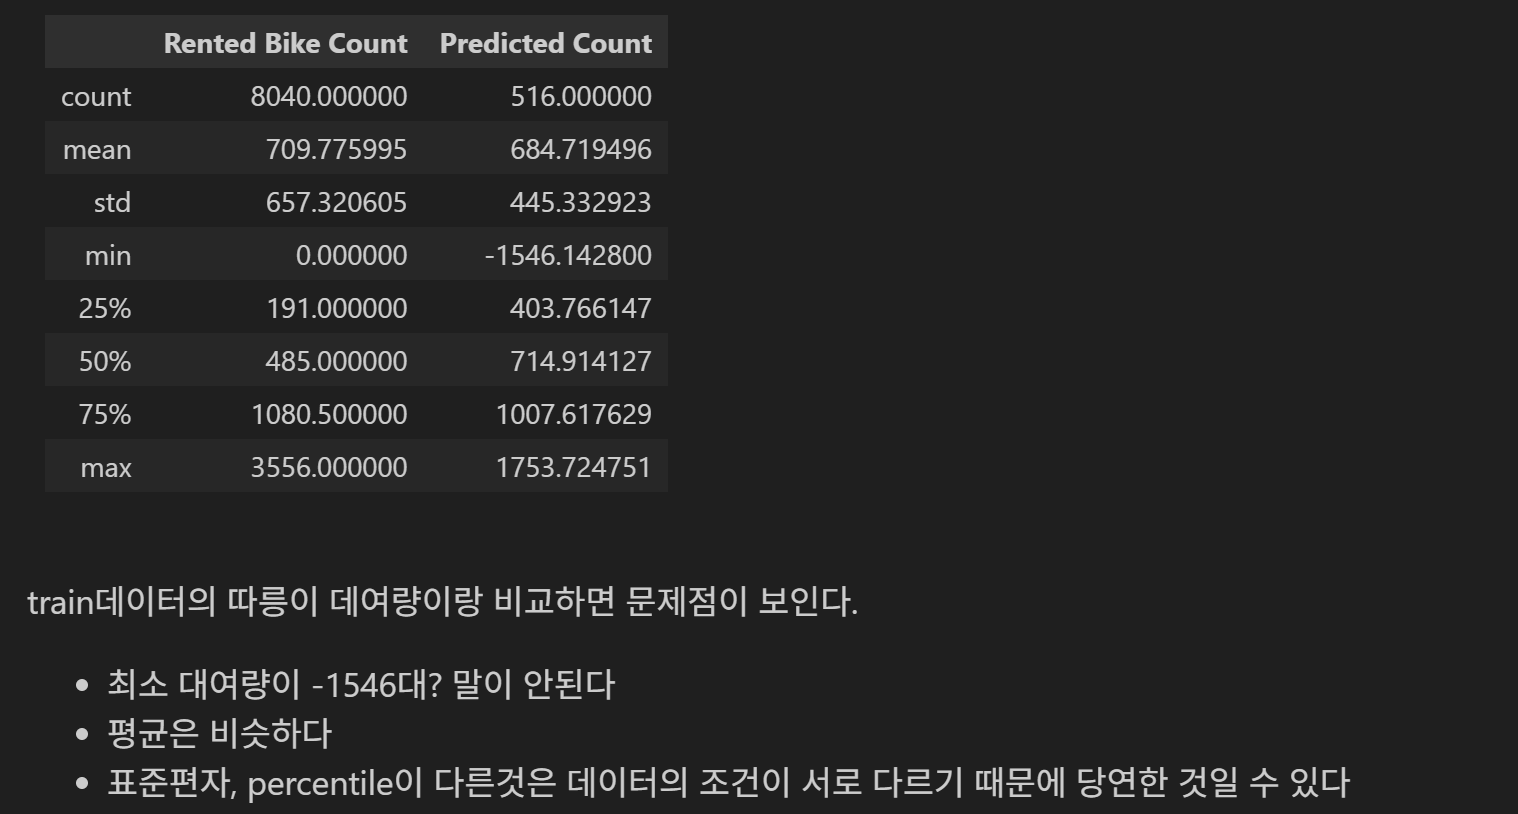

마지막 결론 부분에서 예측에 오류가 발생한 부분이 있었다.
- 나는 이 오류가 어디서 생겼는지 발견할 수 있었다.

In [507]:
# train데이터에는 있지만 test에는 없는 변수가 있다. 이를 모두 0으로 추가해주자
# missing_cols = ['Holiday_No Holiday', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'year_2018']
# for col in missing_cols:
# 	if col not in test.columns:
# 		test[col] = 0

# test = test[X.columns]

위의 코드는 저번 시간에 train에는 있지만 test데이터에 없는 것들을 레퍼런스 코딩을 추가한 부분이다

In [508]:
test_data.Holiday.unique()

array(['No Holiday'], dtype=object)

test데이터에는 Holiday가 전부 No Holiday이다. 따라서 레퍼런스 코딩이 1 또는 True로 들어가야 하지만 전부 0으로 넣어버리는 오류를 범하였다.

In [509]:
test_data.Seasons.unique()

array(['Autumn', nan], dtype=object)

Seasons는 전부 Autumn이므로 이 부분은 문제 없다.

In [510]:
test_data.Date.unique()

array(['01/11/2018', '02/11/2018', '03/11/2018', '04/11/2018',
       '05/11/2018', '06/11/2018', '07/11/2018', '08/11/2018',
       '09/11/2018', '10/11/2018', '11/11/2018', '12/11/2018',
       '13/11/2018', '14/11/2018', '15/11/2018', '16/11/2018',
       '17/11/2018', '18/11/2018', '19/11/2018', '20/11/2018',
       '21/11/2018', '22/11/2018', '23/11/2018', '24/11/2018',
       '25/11/2018', '26/11/2018', '27/11/2018', '28/11/2018',
       '29/11/2018', '30/11/2018'], dtype=object)

year부분은 전부 2018이므로 1 또는 True로 들어가는게 맞다.

`오류를 고쳐보자`

In [511]:
['Holiday_No Holiday', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'year_2018']

['Holiday_No Holiday',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'year_2018']

In [512]:
test[['Holiday_No Holiday','year_2018']]=True
test[['Seasons_Spring','Seasons_Summer','Seasons_Winter']]=False
test[['Holiday_No Holiday','year_2018','Seasons_Spring','Seasons_Summer','Seasons_Winter']].value_counts()

Holiday_No Holiday  year_2018  Seasons_Spring  Seasons_Summer  Seasons_Winter
True                True       False           False           False             646
Name: count, dtype: int64

저번에 생성했던 최종 모델을 불러오기

In [513]:
# 저장된 모델 불러오기
with open('따릉이_model.sav', 'rb') as file:
    final_model = pickle.load(file)

In [514]:
final_model.get_params #alpha가 1.5인 Lasso모델이다

<bound method BaseEstimator.get_params of Lasso(alpha=1.5)>

# 따릉이 대여량 재예측

In [515]:
predict_count=final_model.predict(test)
predict_count_df = pd.DataFrame(predict_count, columns=['Predicted Count'])
predict_count_df

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


에러가 발생한 이유는 모델의 피쳐와 test데이터의 피쳐의 순서가 다르기 때문이라고 한다 (gpt피셜)

In [516]:
set(final_model.feature_names_in_) - set(test.columns) #누락된 변수가 있는지 확인

set()

누락된 변수들은 없다

변수들 이름의 순서가 서로 다르니 동일하게 맞추어야한다

In [517]:
test = test[final_model.feature_names_in_]

In [518]:
predict_count=final_model.predict(test)
predict_count_df = pd.DataFrame(predict_count, columns=['Predicted Count'])
predict_count_df

,Predicted Count
0,662.000353
1,574.224297
2,368.125042
3,259.434946
4,230.167465
...,...
641,1352.340914
642,1222.800396
643,1156.979245
644,1062.196754


오류가 해결되었다

In [519]:
predict_test=test_data.dropna(subset=["Wind speed (m/s)"])

In [520]:
predict_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 646 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       646 non-null    object 
 1   Hour                       646 non-null    int64  
 2   Temperature(째C)            575 non-null    float64
 3   Humidity(%)                646 non-null    int64  
 4   Wind speed (m/s)           646 non-null    float64
 5   Visibility (10m)           646 non-null    int64  
 6   Dew point temperature(째C)  646 non-null    float64
 7   Solar Radiation (MJ/m2)    646 non-null    float64
 8   Rainfall(mm)               646 non-null    float64
 9   Snowfall (cm)              646 non-null    float64
 10  Seasons                    579 non-null    object 
 11  Holiday                    646 non-null    object 
 12  Functioning Day            646 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 70.7+ 

In [538]:
predict_data=pd.concat([predict_test.reset_index(drop=True), predict_count_df["Predicted Count"]], axis=1)
predict_data=pd.concat([predict_data, test_data[test_data["Wind speed (m/s)"].isna()].reset_index(drop=True)], axis=0)
predict_data=predict_data.reset_index(drop=True)
predict_data

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Predicted Count
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.00,0.0,0.0,Autumn,No Holiday,Yes,662.000353
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,574.224297
2,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,368.125042
3,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,259.434946
4,01/11/2018,5,3.3,72,0.0,1946,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,230.167465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,27/11/2018,12,9.3,61,NaN,390,2.1,0.85,0.0,0.0,Autumn,No Holiday,Yes,NaN
716,27/11/2018,13,11.0,60,NaN,411,3.5,0.85,0.0,0.0,Autumn,No Holiday,Yes,NaN
717,28/11/2018,7,2.5,24,NaN,1306,-16.0,0.00,0.0,0.0,NaN,No Holiday,Yes,NaN
718,28/11/2018,22,3.2,34,NaN,1787,-11.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,NaN


원본 test_data에다 예측한 데이터 합쳐서 predict_data만들기

In [541]:
predict_data.isna().sum()   

Date                          0
Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
Predicted Count              74
dtype: int64

### **train데이터의 대여대수와의 비교**

In [543]:
pd.concat([pd.DataFrame(train_data['Rented Bike Count'].describe()), pd.DataFrame(predict_data['Predicted Count'].describe() )], axis=1)

,Rented Bike Count,Predicted Count
count,8040.000000,646.000000
mean,709.775995,724.561774
std,657.320605,448.158085
min,0.000000,-1537.606107
25%,191.000000,441.852098
50%,485.000000,761.009459
75%,1080.500000,1045.811112
max,3556.000000,1780.724875


왜 계속 이상치가 발생하는 것일까

In [561]:
predict_data.drop(["Holiday","Seasons"] , axis=1).query("`Predicted Count` < 0").sort_values("Predicted Count")

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Predicted Count
173,09/11/2018,0,12.0,96,3.1,1185,11.3,0.00,18.0,0.0,No,-1537.606107
46,03/11/2018,5,6.1,75,1.0,1053,1.9,0.00,0.0,0.0,No,-664.715835
115,06/11/2018,5,8.8,84,0.6,420,6.2,0.00,0.0,0.0,No,-654.154262
114,06/11/2018,4,9.1,81,0.0,493,6.0,0.00,0.0,0.0,No,-617.363316
176,09/11/2018,3,10.8,82,2.8,1712,7.8,0.00,0.5,0.0,No,-561.848858
113,06/11/2018,3,NaN,81,0.3,500,6.2,0.00,0.0,0.0,No,-557.536162
177,09/11/2018,4,10.6,75,3.2,913,6.3,0.00,0.0,0.0,No,-538.955233
47,03/11/2018,6,5.5,78,0.6,983,1.9,0.00,0.0,0.0,No,-511.677378
175,09/11/2018,2,11.3,88,3.7,1680,9.3,0.00,0.0,0.0,No,-489.330288
178,09/11/2018,5,10.9,68,3.1,1034,5.2,0.00,0.0,0.0,No,-487.204612


과적합이 발생하였기 때문이다. 따라서 우리는 필요한 변수만 선택하여 모델을 적합시켜야 한다.
- alpha값은 이미 1.5로 최적의 값을 지난시간에 찾았지만 현재 과적합이 발생했기 때문이다.

# statsmodel이였으면 여러 통계점수로 변수를 선택하였겠지만 Lasso모델에서는 어떻게 해야할지 잘 모르겠다.

In [564]:
train.corr()

,Rented Bike Count,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day_Yes,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,year_2018,Seasons_Spring,Seasons_Summer,Seasons_Winter
Rented Bike Count,1.000000,0.552879,-0.191887,0.115569,0.204563,0.398079,0.268195,-0.127147,-0.149691,0.182070,...,0.004458,0.015371,-0.052541,-0.010864,-0.004479,0.015049,0.225788,0.010565,0.307444,-0.445065
Temperature(째C),0.552879,1.000000,0.164617,-0.058456,0.033682,0.916802,0.347086,0.048941,-0.239628,-0.056110,...,0.004448,0.001245,0.007094,-0.006467,0.006351,-0.003323,0.398247,-0.021296,0.662950,-0.780829
Humidity(%),-0.191887,0.164617,1.000000,-0.344381,-0.540364,0.533595,-0.472403,0.246236,0.077912,-0.005015,...,-0.001143,-0.037443,0.000721,0.059731,-0.017654,0.014356,0.036524,0.016706,0.203034,-0.250273
Wind speed (m/s),0.115569,-0.058456,-0.344381,1.000000,0.160908,-0.196218,0.330732,-0.032976,-0.000537,0.011002,...,-0.007792,0.018928,-0.046201,0.011955,0.006060,0.038103,0.009662,0.065322,-0.083633,0.098785
Visibility (10m),0.204563,0.033682,-0.540364,0.160908,1.000000,-0.172236,0.153354,-0.182604,-0.106362,-0.075458,...,-0.014054,-0.000354,-0.023333,-0.028494,0.048173,0.035607,0.068425,-0.219913,0.043821,-0.015952
Dew point temperature(째C),0.398079,0.916802,0.533595,-0.196218,-0.172236,1.000000,0.088933,0.127256,-0.180562,-0.051677,...,0.006726,-0.017332,0.001964,0.016696,0.004084,0.003385,0.355816,-0.022899,0.653914,-0.764558
Solar Radiation (MJ/m2),0.268195,0.347086,-0.472403,0.330732,0.153354,0.088933,1.000000,-0.079472,-0.079209,-0.010252,...,-0.008366,0.024750,-0.007237,-0.014995,-0.009343,0.006890,0.138738,0.070332,0.114832,-0.198934
Rainfall(mm),-0.127147,0.048941,0.246236,-0.032976,-0.182604,0.127256,-0.079472,1.000000,-0.005893,0.007023,...,0.018521,-0.012794,0.003047,0.006406,0.007158,-0.004799,0.029410,0.017853,0.052591,-0.065079
Snowfall (cm),-0.149691,-0.239628,0.077912,-0.000537,-0.106362,-0.180562,-0.079209,-0.005893,1.000000,0.029484,...,-0.006643,-0.063365,-0.023134,0.007537,0.018505,0.079689,-0.259499,-0.108189,-0.108039,0.290162
Functioning Day_Yes,0.182070,-0.056110,-0.005015,0.011002,-0.075458,-0.051677,-0.010252,0.007023,0.029484,1.000000,...,0.068703,0.052596,0.015768,-0.028937,-0.087644,-0.034272,-0.054018,0.025145,0.104129,0.101613


상관계수로는 어떤 변수를 제거해야하는지 잘 모르겠다.

alpha가 작으면 과적합, 크면 과소적합인데 지금은 1.5이므로 과소적합이 발생하여야 한다. 하지만 과적합 발생

In [565]:
final_model.coef_

array([ 271.69566697, -153.48200996,    0.        ,   -0.        ,
          0.        ,   19.8828134 ,  -70.93447085,   14.58637644,
        916.02022483,   83.77366048,  -51.89874304, -163.8982239 ,
       -238.03762276, -295.80347587, -303.37056855, -114.45479942,
        113.9239251 ,  485.37567356,   27.28743119,  -98.48749813,
       -108.3920486 ,  -61.88896483,  -35.99229523,  -62.76118076,
         -0.        ,   74.39104801,  329.1492098 ,  770.42233374,
        512.95083672,  423.72327032,  390.69160559,  322.04514241,
        112.31363156,  -22.64400986,  -18.39162861, -102.28683182,
          0.        ,    0.        ,   21.91966413,  -61.96167005,
       -162.21166494, -121.96681282, -431.95744378])

회귀계수를 0으로 만드는 것이 lasso회귀라는데, 이것들을 보면 과적합을 막는것 같진 않다.
- alpha값을 엄청 높여야 하나?

# 다시 한번 Lasso

In [567]:
lasso_model=Lasso(fit_intercept=True)

In [569]:
hyperparam = {'alpha' : np.logspace(-2, 1, 100), #GPT추천, 0.01부터 10까지 100개
              'max_iter' : np.arange(100, 1600, 100) #최적화 알고리즘 반복횟수
              } 

In [573]:
grid_lasso=GridSearchCV(lasso_model, param_grid=hyperparam, cv=5, scoring="r2", n_jobs=-1, verbose=1)
grid_lasso.fit(X_train, Y_train) #위에서 결측치를 제거한 데이터에서 새로로 분할했었다

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.608e+08, tolerance: 2.565e+05
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 0.01      ,  0.01072267,  0.01149757,  0.01232847,  0.01321941,
        0.01417474,  0.01519911,  0.01629751,  0.01747528,  0.01873817,
        0.02009233,  0.02154435,  0.0231013 ,  0.02477076,  0.02656088,
        0.02848036,  0.03053856,  0.03274549,  0.03511192,  0.03764936,
        0.04037017,  0.04328761,  0.04641589,  0.04977024,  0.05336699,
        0.0572236...
        1.87381742,  2.009233  ,  2.15443469,  2.3101297 ,  2.47707636,
        2.65608778,  2.84803587,  3.05385551,  3.27454916,  3.51119173,
        3.76493581,  4.03701726,  4.32876128,  4.64158883,  4.97702356,
        5.33669923,  5.72236766,  6.13590727,  6.57933225,  7.05480231,
        7.56463328,  8.11130831,  8.69749003,  9.32603347, 10.        ]),
                         'max_iter': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500])},
             scoring='r2', verbose=1)

In [574]:
grid_lasso.best_params_

{'alpha': 0.026560877829466867, 'max_iter': 100}

alpha값이 낮다

In [575]:
best_lasso=grid_lasso.best_estimator_

In [576]:
eval_regression(best_lasso)

학습 능력
학습 결정계수 :  0.6674786001915552
학습 RMSE :  383.787818026811
학습 MAPE :  163.64725319169395 %


일반화 능력
검정 결정계수 :  0.664052313038052
검정 RMSE :  367.7984241878769
검정 MAPE :  185.88297433223892 %


In [580]:
pd.DataFrame(best_lasso.predict(test)).describe()

,0
count,646.000000
mean,756.544867
std,486.313960
min,-1724.361397
25%,477.840309
50%,792.365787
75%,1100.073528
max,1837.569420


# 과적합을 해결 못하겟다